In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
from bokeh.plotting import figure
from bokeh.io import show, output_notebook

In [2]:
df_train = pd.read_csv('./assets/train.csv')
df_test = pd.read_csv('./assets/test.csv')

In [3]:
df_train.head(1)

,Date,Address,Species,Block,Street,Trap,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy,NumMosquitos,WnvPresent
0,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS/RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9,1,0


In [4]:
df_test.head(1)

,Id,Date,Address,Species,Block,Street,Trap,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy
0,1,2008-06-11,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS/RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9


In [5]:
#Define function to conduct basic EDA
def eda(dataframe):
    """Runs basic EDA on dataframe."""
    print("missing values \n", dataframe.isnull().sum(), '\n')
    print("dataframe index \n", dataframe.index, '\n')
    print("dataframe types \n", dataframe.dtypes, '\n')
    print("dataframe shape \n", dataframe.shape, '\n')
    print("dataframe describe \n", dataframe.describe(include='all'), '\n')

In [6]:
eda(df_train)

missing values 
 Date                      0
Address                   0
Species                   0
Block                     0
Street                    0
Trap                      0
AddressNumberAndStreet    0
Latitude                  0
Longitude                 0
AddressAccuracy           0
NumMosquitos              0
WnvPresent                0
dtype: int64 

dataframe index 
 RangeIndex(start=0, stop=10506, step=1) 

dataframe types 
 Date                       object
Address                    object
Species                    object
Block                       int64
Street                     object
Trap                       object
AddressNumberAndStreet     object
Latitude                  float64
Longitude                 float64
AddressAccuracy             int64
NumMosquitos                int64
WnvPresent                  int64
dtype: object 

dataframe shape 
 (10506, 12) 

dataframe describe 
               Date                                            Address  \
coun

In [7]:
eda(df_test)

missing values 
 Id                        0
Date                      0
Address                   0
Species                   0
Block                     0
Street                    0
Trap                      0
AddressNumberAndStreet    0
Latitude                  0
Longitude                 0
AddressAccuracy           0
dtype: int64 

dataframe index 
 RangeIndex(start=0, stop=116293, step=1) 

dataframe types 
 Id                          int64
Date                       object
Address                    object
Species                    object
Block                       int64
Street                     object
Trap                       object
AddressNumberAndStreet     object
Latitude                  float64
Longitude                 float64
AddressAccuracy             int64
dtype: object 

dataframe shape 
 (116293, 11) 

dataframe describe 
                    Id        Date  \
count   116293.000000      116293   
unique            NaN          95   
top               NaN  201

Test data does not have the column 'NumMosquitos'

In [8]:
df_train['Date'] = pd.to_datetime(df_train.Date)
df_test['Date'] = pd.to_datetime(df_test.Date)

In [9]:
df_train['Month'] = df_train.Date.dt.month
df_train['Year'] = df_train.Date.dt.year

df_test['Month'] = df_test.Date.dt.month
df_test['Year'] = df_test.Date.dt.year

In [10]:
df_train['Weekday'] = df_train.Date.dt.weekday_name

In [11]:
#Find Satellite Trap in Train Data
for i in df_train['Trap'].value_counts().index:
    if len(i) == 5:
        print(i)

T054C
T094B


In [12]:
#Find extra categories in Trap in Test data
for i in df_test['Trap'].value_counts().index:
    if i not in df_train['Trap'].value_counts().index:
        print(i)

T090A
T065A
T200A
T218C
T218B
T090B
T234
T128A
T002A
T002B
T090C
T218A
T200B


'T234' is present in df_test['Trap'] but not df_train['Trap']

In [13]:
#convert all satellite trap to have the same trap name as parent trap
trap_rename = lambda x: x[0:4] if len(x)==5 else x
df_train['Trap'] = df_train['Trap'].apply(trap_rename)
df_test['Trap'] = df_test['Trap'].apply(trap_rename)

In [14]:
#Remove T in Trap name
remove_t = lambda x: x.replace('T','')
df_train['Trap'] = df_train['Trap'].apply(remove_t)
df_test['Trap'] = df_test['Trap'].apply(remove_t)

#Convert Trap type to int
df_train['Trap'] = df_train['Trap'].astype('int64')
df_test['Trap'] = df_test['Trap'].astype('int64')

In [15]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10506 entries, 0 to 10505
Data columns (total 15 columns):
Date                      10506 non-null datetime64[ns]
Address                   10506 non-null object
Species                   10506 non-null object
Block                     10506 non-null int64
Street                    10506 non-null object
Trap                      10506 non-null int64
AddressNumberAndStreet    10506 non-null object
Latitude                  10506 non-null float64
Longitude                 10506 non-null float64
AddressAccuracy           10506 non-null int64
NumMosquitos              10506 non-null int64
WnvPresent                10506 non-null int64
Month                     10506 non-null int64
Year                      10506 non-null int64
Weekday                   10506 non-null object
dtypes: datetime64[ns](1), float64(2), int64(7), object(5)
memory usage: 1.2+ MB


In [16]:
#Check for total mosquito count
df_train['NumMosquitos'].sum()

135039

In [17]:
#Each row only has maximum 50 mosquito before a new row is created, need to sum up the total mosquito by species,
#trap,date and WnvPresent
df_train.groupby(['Date', 'Trap', 'Species','WnvPresent'], as_index=False)['NumMosquitos'].sum().sort_values(by='NumMosquitos').tail(3)

,Date,Trap,Species,WnvPresent,NumMosquitos
1481,2007-08-16,115,CULEX PIPIENS,0,2050
1954,2007-08-28,115,CULEX PIPIENS,0,2107
566,2007-07-25,115,CULEX PIPIENS,0,2206


In [18]:
#merge total mosquito with train data
df_train = pd.merge(df_train, df_train.groupby(['Date', 'Trap', 'Species','WnvPresent'], as_index=False)['NumMosquitos'].sum(), 
                    how='left', on=['Date', 'Trap', 'Species','WnvPresent'])
#rename column wich include total mosquito
df_train.columns = ['Date', 'Address', 'Species', 'Block', 'Street', 'Trap',
       'AddressNumberAndStreet', 'Latitude', 'Longitude', 'AddressAccuracy',
       'NumMosquitos', 'WnvPresent','Month','Year','Weekday','Tot_Mos_Species']
df_train.head(1)

,Date,Address,Species,Block,Street,Trap,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy,NumMosquitos,WnvPresent,Month,Year,Weekday,Tot_Mos_Species
0,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS/RESTUANS,41,N OAK PARK AVE,2,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9,1,0,5,2007,Tuesday,1


In [19]:
df_train[df_train.duplicated(subset=['Date', 'Trap', 'Species','Tot_Mos_Species','WnvPresent'],keep=False)]

,Date,Address,Species,Block,Street,Trap,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy,NumMosquitos,WnvPresent,Month,Year,Weekday,Tot_Mos_Species
98,2007-06-26,"2200 West 113th Street, Chicago, IL 60643, USA",CULEX PIPIENS/RESTUANS,22,W 113TH ST,86,"2200 W 113TH ST, Chicago, IL",41.688324,-87.676709,8,1,0,6,2007,Tuesday,2
99,2007-06-26,"2200 West 113th Street, Chicago, IL 60643, USA",CULEX PIPIENS/RESTUANS,22,W 113TH ST,86,"2200 W 113TH ST, Chicago, IL",41.688324,-87.676709,8,1,0,6,2007,Tuesday,2
280,2007-07-11,"7900 West Foster Avenue, Chicago, IL 60656, USA",CULEX RESTUANS,79,W FOSTER AVE,15,"7900 W FOSTER AVE, Chicago, IL",41.974089,-87.824812,8,1,0,7,2007,Wednesday,3
281,2007-07-11,"7900 West Foster Avenue, Chicago, IL 60656, USA",CULEX RESTUANS,79,W FOSTER AVE,15,"7900 W FOSTER AVE, Chicago, IL",41.974089,-87.824812,8,2,0,7,2007,Wednesday,3
293,2007-07-11,"2200 West 113th Street, Chicago, IL 60643, USA",CULEX PIPIENS/RESTUANS,22,W 113TH ST,86,"2200 W 113TH ST, Chicago, IL",41.688324,-87.676709,8,50,0,7,2007,Wednesday,143
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10443,2013-09-26,"1100 South California Avenue, Chicago, IL 6061...",CULEX PIPIENS/RESTUANS,11,S CALIFORNIA,47,"1100 S CALIFORNIA, Chicago, IL",41.868142,-87.696269,9,9,0,9,2013,Thursday,11
10486,2013-09-26,"ORD Terminal 5, O'Hare International Airport, ...",CULEX PIPIENS,10,W OHARE AIRPORT,900,"1000 W OHARE AIRPORT, Chicago, IL",41.974689,-87.890615,9,16,0,9,2013,Thursday,37
10487,2013-09-26,"ORD Terminal 5, O'Hare International Airport, ...",CULEX PIPIENS,10,W OHARE AIRPORT,900,"1000 W OHARE AIRPORT, Chicago, IL",41.974689,-87.890615,9,9,0,9,2013,Thursday,37
10488,2013-09-26,"ORD Terminal 5, O'Hare International Airport, ...",CULEX PIPIENS,10,W OHARE AIRPORT,900,"1000 W OHARE AIRPORT, Chicago, IL",41.974689,-87.890615,9,11,0,9,2013,Thursday,37


In [20]:
#Drop duplicated rows
df_train = df_train[df_train.duplicated(subset=['Date', 'Trap', 'Species','Tot_Mos_Species','WnvPresent']) == False]
len(df_train)

8599

In [21]:
#Check for total mosquito count
df_train['Tot_Mos_Species'].sum()

135039

In [22]:
df_train['Species'] = df_train['Species'].apply(lambda x:x.replace('CULEX',''))
df_test['Species'] = df_test['Species'].apply(lambda x:x.replace('CULEX',''))

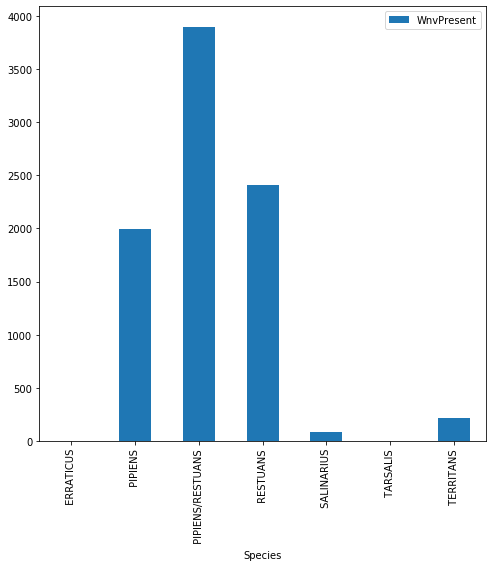

In [23]:
df_train[['Species','WnvPresent']].groupby('Species').count().plot(kind='bar',figsize=(8,8))

Group 'ERRATICUS','SALINARIUS','TARSALIS','TERRTANS' as others

In [24]:
others = [' ERRATICUS',' SALINARIUS',' TARSALIS',' TERRITANS']
df_train['Species'] = df_train['Species'].apply(lambda x: 'Others' if x in others else x.replace(' ',''))
df_test['Species'] = df_test['Species'].apply(lambda x: 'Others' if x in others else x.replace(' ',''))

In [25]:
df_train['Species'].value_counts()

PIPIENS/RESTUANS    3893
RESTUANS            2406
PIPIENS             1994
Others               306
Name: Species, dtype: int64

In [26]:
df_test['Species'].value_counts()

Others              57398
PIPIENS/RESTUANS    15359
RESTUANS            14670
PIPIENS             14521
UNSPECIFIED         14345
Name: Species, dtype: int64

Test data has an extra category 'UNSPECIFIED' under column Species.

In [27]:
#Write cleaned datasets out
df_train.to_csv('./assets/train_cleaned.csv', index=False)
df_test.to_csv('./assets/test_cleaned.csv', index=False)

In [28]:
#Find baseline %
df_train['WnvPresent'].value_counts(normalize=True)

0    0.946854
1    0.053146
Name: WnvPresent, dtype: float64

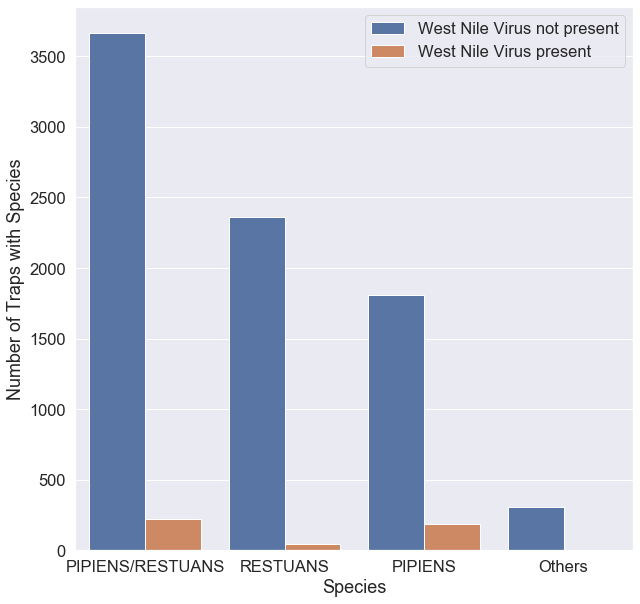

In [29]:
plt.figure(figsize=(10,10))
sns.set(font_scale=1.5)
sns.countplot(x='Species', hue='WnvPresent', data=df_train)
plt.xticks(rotation=0)
plt.legend(['West Nile Virus not present', 'West Nile Virus present'], loc=1)
plt.ylabel('Number of Traps with Species')

plt.savefig('./graphs/2011_spray_area.png',bbox_inches='tight')
plt.show()

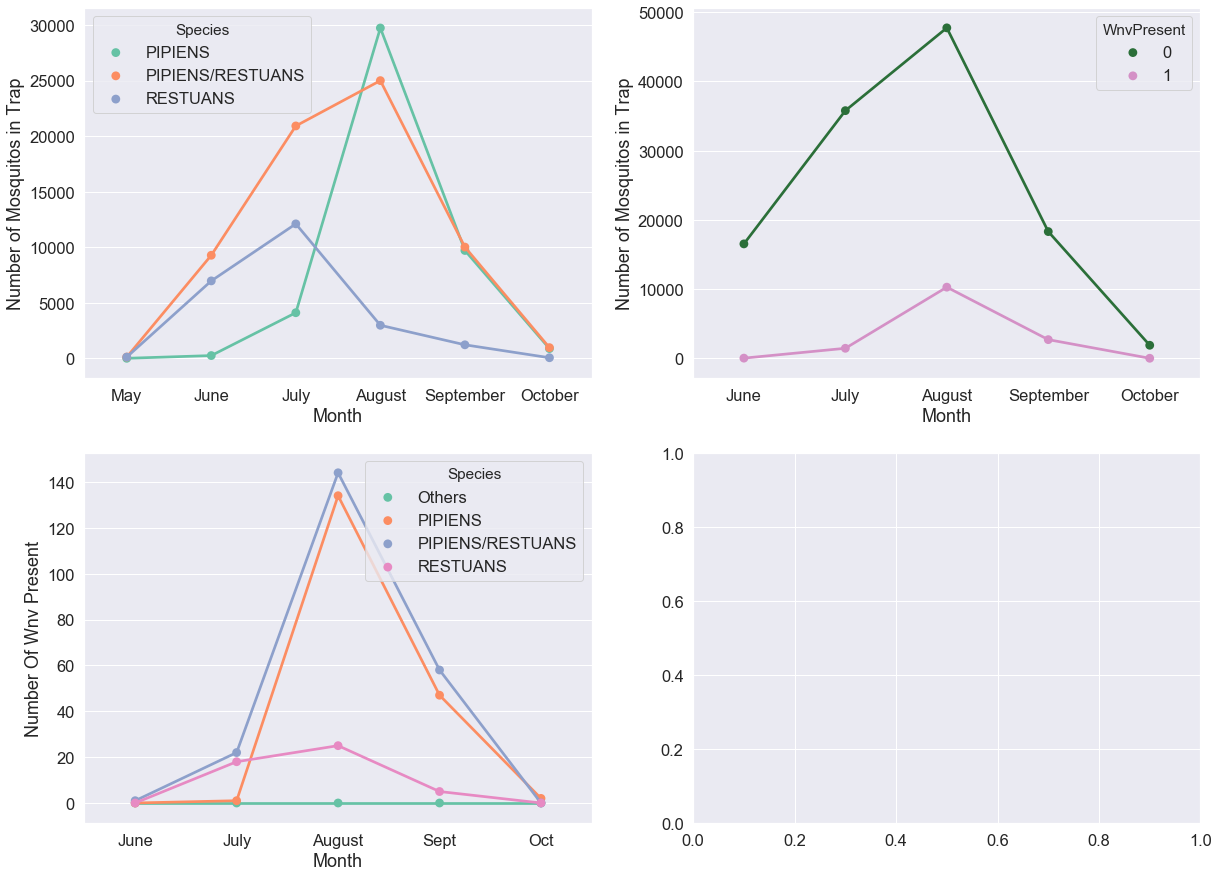

In [30]:
fig, axes = plt.subplots(nrows=2,ncols=2,figsize=(20,15))
axes = axes.ravel()
sns.pointplot(x='Month',y='Tot_Mos_Species',hue = 'Species', data = df_train[~df_train['Species'].isin(['Others'])].groupby(['Month','Species'], as_index=False)['Tot_Mos_Species'].sum(),palette='Set2',ax=axes[0])
axes[0].set(xticklabels=['May', 'June', 'July', 'August', 'September', 'October'])
axes[0].set_ylabel('Number of Mosquitos in Trap')

sns.pointplot(x='Month',y='Tot_Mos_Species',hue ='WnvPresent', data = df_train[~df_train['Month'].isin([5])].groupby(['Month','WnvPresent'], as_index=False)['Tot_Mos_Species'].sum(),palette='cubehelix',ax=axes[1])
axes[1].set(xticklabels=['June', 'July', 'August', 'September', 'October'])
axes[1].set_ylabel('Number of Mosquitos in Trap')

sns.pointplot(x='Month',y='WnvPresent',hue ='Species', data = df_train[~df_train['Month'].isin([5])].groupby(['Month','Species'], as_index=False)['WnvPresent'].sum(),palette='Set2',ax=axes[2])
axes[2].set(xticklabels=['June','July','August','Sept',"Oct"])
axes[2].set_ylabel('Number Of Wnv Present')

plt.savefig('./graphs/train_eda_plot1.png',bbox_inches='tight')
plt.show()

There are the most number of mosquitos in August for Pipens & Pipens/Restuans.

August seems to be the peak of the Wnv Present case for all years in train data. Comparing with the graph above, the mosquito species Pipen seems to have the most significant impact on Wnv Present by looking at data in August.

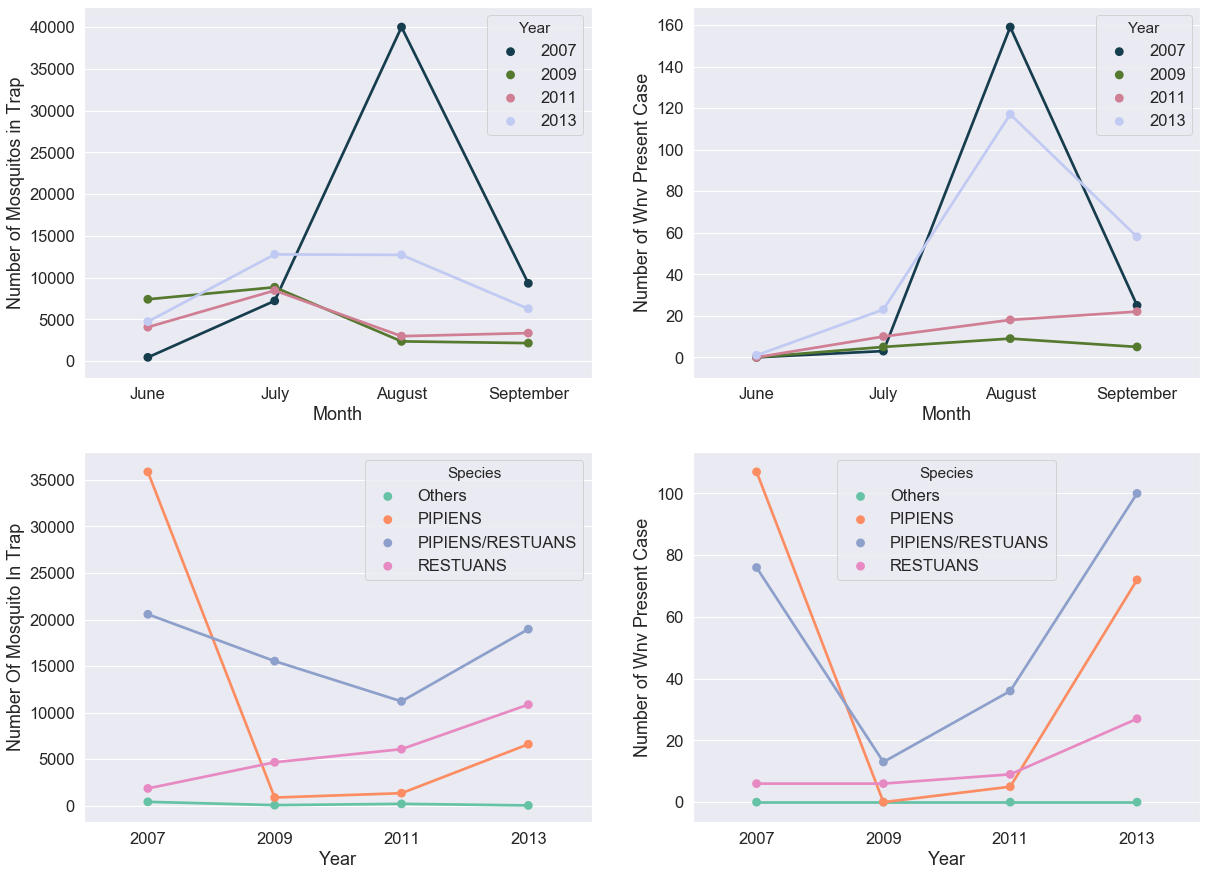

In [31]:
fig, axes = plt.subplots(nrows=2,ncols=2,figsize=(20,15))
axes = axes.ravel()
sns.pointplot(x='Month',y='Tot_Mos_Species',hue ='Year', data = df_train[~df_train['Month'].isin([5,10])].groupby(['Month','Year'], as_index=False)['Tot_Mos_Species'].sum(),palette='cubehelix',ax=axes[0])
axes[0].set(xticklabels=['June', 'July', 'August', 'September', 'October'])
axes[0].set_ylabel('Number of Mosquitos in Trap')

sns.pointplot(x='Month',y='WnvPresent',hue ='Year', data = df_train[~df_train['Month'].isin([5,10])].groupby(['Month','Year'], as_index=False)['WnvPresent'].sum(),palette='cubehelix',ax=axes[1])
axes[1].set(xticklabels=['June', 'July', 'August', 'September', 'October'])
axes[1].set_ylabel('Number of Wnv Present Case')

sns.pointplot(x='Year',y='Tot_Mos_Species',hue ='Species', data = df_train.groupby(['Year','Species'], as_index=False)['Tot_Mos_Species'].sum(),palette='Set2',ax=axes[2])
axes[2].set(xticklabels=['2007', '2009', '2011', '2013'])
axes[2].set_ylabel('Number Of Mosquito In Trap')

sns.pointplot(x='Year',y='WnvPresent',hue ='Species', data = df_train.groupby(['Year','Species'], as_index=False)['WnvPresent'].sum(),palette='Set2',ax=axes[3])
axes[3].set(xticklabels=['2007', '2009', '2011', '2013'])
axes[3].set_ylabel('Number of Wnv Present Case')

plt.savefig('./graphs/train_eda_plot2.png',bbox_inches='tight')

plt.show()

There is a sharp drop in no. of Wnv Present cases between 2007 to 2009 and sharp increase between 2011 and 2013. Let's investigate the possible reasons.

There is a sharp drop in PIPENS mosquito from 2007 to 2009 and increase from 2011 to 2013. Combining with the analysis above, it tallys that PIPENS mosquito seems to be a major factor affecting whether Wnv is present.  It is hard to tell whether number of mosquito affects the present of Wnv yet, but the present of the species seems to have an impact on the present of Wnv.

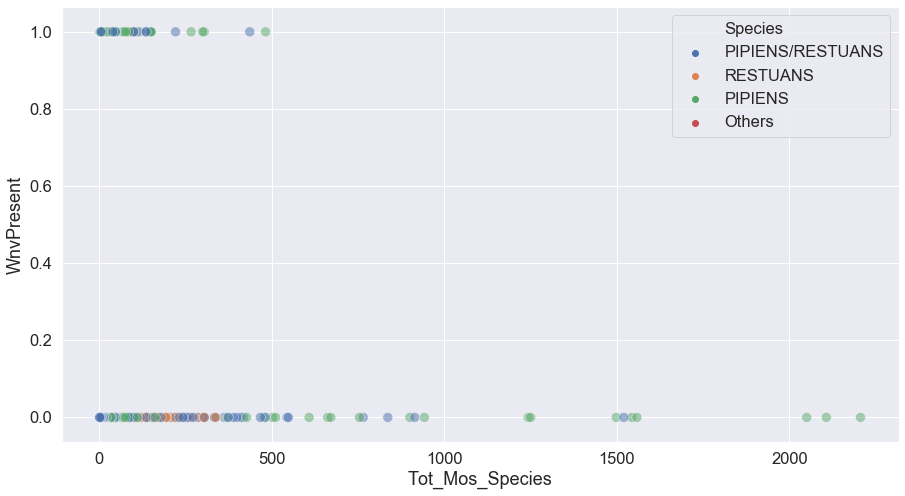

In [32]:
#PLot of WnvPresent and Tot_Mos_species
plt.figure(figsize=(15,8))
sns.scatterplot(x='Tot_Mos_Species',y='WnvPresent',hue='Species',data=df_train,alpha=0.5,s=100)
plt.show()

From the scatter plot above, we can see that Wnv are only present when total number of mosquito by species are below 500, and all of them belong to Species Pipens and Pipes/Restuans. It is a rather weird observation as we should expect Wnv present to increase with total number of mosquito by species. Hence, there are other factors which we can't find out from train dataset.

In [33]:
#Adding additional columns for the graph 
df_train['month_year'] = df_train['Date'].dt.to_period('M')

train_eda = df_train.groupby(["month_year","WnvPresent"],as_index=False)["Date"].count()
train_eda.rename({'Date':'Count'},axis = 'columns',inplace=True)

train_eda['month_year'] = train_eda['month_year'].astype(str)

train_eda  = pd.DataFrame(pd.pivot_table(train_eda,values='Count',index=['month_year'],columns=['WnvPresent']))

train_eda.columns = ['WnvPresent_0','WnvPresent_1']

train_eda2 = df_train.groupby(["month_year"],as_index=False)["NumMosquitos"].sum()

train_eda2['month_year'] = train_eda2['month_year'].astype(str)

train_eda= pd.merge(train_eda,train_eda2,left_on="month_year", right_on="month_year")


In [34]:
# Create a blank figure with labels
p = figure(plot_width = 900, plot_height = 600, 
           title = 'Trend of Virus Presence',
           x_axis_label = 'month_year', y_axis_label = 'No of Trap')


x = train_eda['month_year'].tolist()
y1= train_eda['WnvPresent_1'].tolist()

p = figure(plot_width = 900, plot_height = 600, 
           title = 'Trend of Virus Presence',
           x_axis_label = 'month_year', y_axis_label = 'No of Trap',x_range = x)


p.line(x,y1, line_width =2,name="Virus Presence",legend= 'Virus Present',color='#EC343F')
#p.xaxis.major_label_orientation = "vertical"

y2= train_eda['WnvPresent_0'].tolist()


p.line(x,y2, line_width =2,name="Virus Nill",legend= 'Virus Nil',color='#35609A')
p.xaxis.major_label_orientation = "vertical"
p.xaxis.axis_label = 'Month_Year'
p.yaxis.axis_label = 'No of Trap'
#p.title = 'Trend on Count of Trap per year/Month'
p.title.text_font_size = '16pt'

output_notebook()
# Show the plot
show(p)

Loading BokehJS ...

In [35]:
# Create a blank figure with labels
p = figure(plot_width = 900, plot_height = 400, 
           title = 'Trend of Virus Presence',
           x_axis_label = 'month_year', y_axis_label = 'No of Trap')


x = train_eda['month_year'].tolist()
y1=train_eda['WnvPresent_0']+train_eda['WnvPresent_1'].tolist()

p = figure(plot_width = 900, plot_height = 600, 
           title = 'No of Traps',
           x_axis_label = 'month_year', y_axis_label = 'No of Trap',x_range = x)


p.vbar(x = x,top=y1,width=0.7,legend= 'No of Traps',color='#35609A')

p.xaxis.major_label_orientation = "vertical"
p.xaxis.axis_label = 'Month_Year'
p.yaxis.axis_label = 'No of Trap'
#p.title = 'Trend on Count of Trap per year/Month'
p.title.text_font_size = '16pt'

output_notebook()
# Show the plot
show(p)

Loading BokehJS ...